<a href="https://colab.research.google.com/github/nisha1365/GEN-AI-POC/blob/main/Oncology_BTM__0_and_(_1)_19th_March.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tweet-preprocessor

In [3]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 65.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 21.3 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/73

In [4]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# import tweet preprocessor
import preprocessor as p

import nltk
import gensim
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from bertopic import BERTopic
#from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
#from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
data= pd.read_csv("/content/Oncology_cleaned_tweets_19th_March.csv")
data

,file_name,tweet_id,text,author_id,conversation_id,created_at,lang,referenced_tweets_type,referenced_tweets_id,clean_text,retweet_count,reply_count,like_count,quote_count,bookmark_count,impression_count
0,search_recent_tweets_Oncology Myeloma 2 _from_...,1732424215666770309,@JuliusEffing @goddeketal @VPrasadMDMPH The pr...,1505548981467758594,1.731399e+18,2023-12-06T15:38:14+00:00,en,replied_to,1732220748066943402,the problem is that you don’t listen and you a...,0,0,1,0,0,18
1,search_recent_tweets_Oncology Myeloma 2 _from_...,1732417301599949272,@JAMouabbi @MDAndersonNews @LobularBCA @OncoAl...,2330640865,1.732413e+18,2023-12-06T15:10:46+00:00,en,replied_to,1732412542029312159,thank you for highlighting our trial targeting...,0,1,3,0,0,127
2,search_recent_tweets_Oncology Myeloma 2 _from_...,1732417280271884435,@RahulBanerjeeMD Tandem 2024 ??,75550503,1.732414e+18,2023-12-06T15:10:41+00:00,en,replied_to,1732415601942069704,tandem 2024 ??,0,1,1,0,0,183
3,search_recent_tweets_Oncology Myeloma 2 _from_...,1732416645015261509,@DanielFrigo @SmiragliaLab @MDAndersonNews @CR...,4352131223,1.732259e+18,2023-12-06T15:08:09+00:00,en,replied_to,1732259305607311539,big congrats!,0,0,2,0,0,120
4,search_recent_tweets_Oncology Myeloma 2 _from_...,1732415160831344759,@JoselleCookMD @RahulBanerjeeMD @theMMRF @myel...,2155590637,1.732377e+18,2023-12-06T15:02:15+00:00,en,replied_to,1732377069382750378,congratulations,0,0,2,0,0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44179,search_recent_tweets_Oncology Myeloma_from_202...,1767128835177259159,"❓ Did you know, there are 3 main types of #Blo...",1037692894197542917,NaN,2024-03-11T10:02:00+00:00,en,0,0,"did you know, there are 3 main types of bloodc...",0,0,0,0,0,40
44180,search_recent_tweets_Oncology Myeloma_from_202...,1767126569481367580,"❓ Did you know, #Myeloma is often referred to ...",1037692894197542917,NaN,2024-03-11T09:53:00+00:00,en,0,0,"did you know, myeloma is often referred to as ...",0,0,0,0,0,40
44181,search_recent_tweets_Oncology Myeloma_from_202...,1767122363500404929,🔬Check out the new publication from the NKUA t...,1641116185688264706,NaN,2024-03-11T09:36:17+00:00,en,0,0,check out the new publication from the nkua te...,0,0,0,0,0,6
44182,search_recent_tweets_Oncology Myeloma_from_202...,1767118034601226434,"This #MyelomaAwarenessMonth, we’re educating p...",1037692894197542917,NaN,2024-03-11T09:19:05+00:00,en,0,0,"this myelomaawarenessmonth, we’re educating pe...",0,0,0,0,0,36


In [7]:
data.columns

Index(['file_name', 'tweet_id', 'text', 'author_id', 'conversation_id',
       'created_at', 'lang', 'referenced_tweets_type', 'referenced_tweets_id',
       'clean_text', 'retweet_count', 'reply_count', 'like_count',
       'quote_count', 'bookmark_count', 'impression_count'],
      dtype='object')

In [8]:
data_tweet = data[['author_id', 'tweet_id', 'text', 'clean_text', 'created_at']]
data_tweet

,author_id,tweet_id,text,clean_text,created_at
0,1505548981467758594,1732424215666770309,@JuliusEffing @goddeketal @VPrasadMDMPH The pr...,the problem is that you don’t listen and you a...,2023-12-06T15:38:14+00:00
1,2330640865,1732417301599949272,@JAMouabbi @MDAndersonNews @LobularBCA @OncoAl...,thank you for highlighting our trial targeting...,2023-12-06T15:10:46+00:00
2,75550503,1732417280271884435,@RahulBanerjeeMD Tandem 2024 ??,tandem 2024 ??,2023-12-06T15:10:41+00:00
3,4352131223,1732416645015261509,@DanielFrigo @SmiragliaLab @MDAndersonNews @CR...,big congrats!,2023-12-06T15:08:09+00:00
4,2155590637,1732415160831344759,@JoselleCookMD @RahulBanerjeeMD @theMMRF @myel...,congratulations,2023-12-06T15:02:15+00:00
...,...,...,...,...,...
44179,1037692894197542917,1767128835177259159,"❓ Did you know, there are 3 main types of #Blo...","did you know, there are 3 main types of bloodc...",2024-03-11T10:02:00+00:00
44180,1037692894197542917,1767126569481367580,"❓ Did you know, #Myeloma is often referred to ...","did you know, myeloma is often referred to as ...",2024-03-11T09:53:00+00:00
44181,1641116185688264706,1767122363500404929,🔬Check out the new publication from the NKUA t...,check out the new publication from the nkua te...,2024-03-11T09:36:17+00:00
44182,1037692894197542917,1767118034601226434,"This #MyelomaAwarenessMonth, we’re educating p...","this myelomaawarenessmonth, we’re educating pe...",2024-03-11T09:19:05+00:00


In [9]:
import pandas as pd
# Assuming 'created_at' is in string format, convert it to datetime
data_tweet['created_at'] = pd.to_datetime(data_tweet['created_at'], errors = 'coerce')

# Create a new column for the date, time, and day
data_tweet['date'] = data_tweet['created_at'].dt.date
data_tweet['time'] = data_tweet['created_at'].dt.time
data_tweet['day_of_week'] = data_tweet['created_at'].dt.day_name()
# Display the updated DataFrame
data_tweet

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week
0,1505548981467758594,1732424215666770309,@JuliusEffing @goddeketal @VPrasadMDMPH The pr...,the problem is that you don’t listen and you a...,2023-12-06 15:38:14+00:00,2023-12-06,15:38:14,Wednesday
1,2330640865,1732417301599949272,@JAMouabbi @MDAndersonNews @LobularBCA @OncoAl...,thank you for highlighting our trial targeting...,2023-12-06 15:10:46+00:00,2023-12-06,15:10:46,Wednesday
2,75550503,1732417280271884435,@RahulBanerjeeMD Tandem 2024 ??,tandem 2024 ??,2023-12-06 15:10:41+00:00,2023-12-06,15:10:41,Wednesday
3,4352131223,1732416645015261509,@DanielFrigo @SmiragliaLab @MDAndersonNews @CR...,big congrats!,2023-12-06 15:08:09+00:00,2023-12-06,15:08:09,Wednesday
4,2155590637,1732415160831344759,@JoselleCookMD @RahulBanerjeeMD @theMMRF @myel...,congratulations,2023-12-06 15:02:15+00:00,2023-12-06,15:02:15,Wednesday
...,...,...,...,...,...,...,...,...
44179,1037692894197542917,1767128835177259159,"❓ Did you know, there are 3 main types of #Blo...","did you know, there are 3 main types of bloodc...",2024-03-11 10:02:00+00:00,2024-03-11,10:02:00,Monday
44180,1037692894197542917,1767126569481367580,"❓ Did you know, #Myeloma is often referred to ...","did you know, myeloma is often referred to as ...",2024-03-11 09:53:00+00:00,2024-03-11,09:53:00,Monday
44181,1641116185688264706,1767122363500404929,🔬Check out the new publication from the NKUA t...,check out the new publication from the nkua te...,2024-03-11 09:36:17+00:00,2024-03-11,09:36:17,Monday
44182,1037692894197542917,1767118034601226434,"This #MyelomaAwarenessMonth, we’re educating p...","this myelomaawarenessmonth, we’re educating pe...",2024-03-11 09:19:05+00:00,2024-03-11,09:19:05,Monday


In [10]:
timestamp=data_tweet.created_at.tolist()

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join tokens back into a string
    filtered_text = ' '.join(tokens)

    return filtered_text

# Remove stopwords from the "clean_text" column
data_tweet['clean_text'] = data_tweet['clean_text'].apply(remove_stopwords)


In [13]:
data_tweet

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week
0,1505548981467758594,1732424215666770309,@JuliusEffing @goddeketal @VPrasadMDMPH The pr...,problem ’ listen apparently completely void em...,2023-12-06 15:38:14+00:00,2023-12-06,15:38:14,Wednesday
1,2330640865,1732417301599949272,@JAMouabbi @MDAndersonNews @LobularBCA @OncoAl...,thank highlighting trial targeting her2 mutati...,2023-12-06 15:10:46+00:00,2023-12-06,15:10:46,Wednesday
2,75550503,1732417280271884435,@RahulBanerjeeMD Tandem 2024 ??,tandem 2024 ? ?,2023-12-06 15:10:41+00:00,2023-12-06,15:10:41,Wednesday
3,4352131223,1732416645015261509,@DanielFrigo @SmiragliaLab @MDAndersonNews @CR...,big congrats !,2023-12-06 15:08:09+00:00,2023-12-06,15:08:09,Wednesday
4,2155590637,1732415160831344759,@JoselleCookMD @RahulBanerjeeMD @theMMRF @myel...,congratulations,2023-12-06 15:02:15+00:00,2023-12-06,15:02:15,Wednesday
...,...,...,...,...,...,...,...,...
44179,1037692894197542917,1767128835177259159,"❓ Did you know, there are 3 main types of #Blo...","know , 3 main types bloodcancer ? leukaemia , ...",2024-03-11 10:02:00+00:00,2024-03-11,10:02:00,Monday
44180,1037692894197542917,1767126569481367580,"❓ Did you know, #Myeloma is often referred to ...","know , myeloma often referred multiplemyeloma ...",2024-03-11 09:53:00+00:00,2024-03-11,09:53:00,Monday
44181,1641116185688264706,1767122363500404929,🔬Check out the new publication from the NKUA t...,check new publication nkua team titled `` expl...,2024-03-11 09:36:17+00:00,2024-03-11,09:36:17,Monday
44182,1037692894197542917,1767118034601226434,"This #MyelomaAwarenessMonth, we’re educating p...","myelomaawarenessmonth , ’ educating people for...",2024-03-11 09:19:05+00:00,2024-03-11,09:19:05,Monday


In [14]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_text(text):
  """Lemmatizes a text.

  Args:
    text: The text to lemmatize.

  Returns:
    The lemmatized text.
  """

  words = nltk.word_tokenize(text)
  lemmas = [nltk.WordNetLemmatizer().lemmatize(word) for word in words]
  return " ".join(lemmas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:
data_tweet['new_lemma_text'] = data_tweet["clean_text"].apply(lemmatize_text)

In [16]:
data_tweet

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week,new_lemma_text
0,1505548981467758594,1732424215666770309,@JuliusEffing @goddeketal @VPrasadMDMPH The pr...,problem ’ listen apparently completely void em...,2023-12-06 15:38:14+00:00,2023-12-06,15:38:14,Wednesday,problem ’ listen apparently completely void em...
1,2330640865,1732417301599949272,@JAMouabbi @MDAndersonNews @LobularBCA @OncoAl...,thank highlighting trial targeting her2 mutati...,2023-12-06 15:10:46+00:00,2023-12-06,15:10:46,Wednesday,thank highlighting trial targeting her2 mutati...
2,75550503,1732417280271884435,@RahulBanerjeeMD Tandem 2024 ??,tandem 2024 ? ?,2023-12-06 15:10:41+00:00,2023-12-06,15:10:41,Wednesday,tandem 2024 ? ?
3,4352131223,1732416645015261509,@DanielFrigo @SmiragliaLab @MDAndersonNews @CR...,big congrats !,2023-12-06 15:08:09+00:00,2023-12-06,15:08:09,Wednesday,big congrats !
4,2155590637,1732415160831344759,@JoselleCookMD @RahulBanerjeeMD @theMMRF @myel...,congratulations,2023-12-06 15:02:15+00:00,2023-12-06,15:02:15,Wednesday,congratulation
...,...,...,...,...,...,...,...,...,...
44179,1037692894197542917,1767128835177259159,"❓ Did you know, there are 3 main types of #Blo...","know , 3 main types bloodcancer ? leukaemia , ...",2024-03-11 10:02:00+00:00,2024-03-11,10:02:00,Monday,"know , 3 main type bloodcancer ? leukaemia , l..."
44180,1037692894197542917,1767126569481367580,"❓ Did you know, #Myeloma is often referred to ...","know , myeloma often referred multiplemyeloma ...",2024-03-11 09:53:00+00:00,2024-03-11,09:53:00,Monday,"know , myeloma often referred multiplemyeloma ..."
44181,1641116185688264706,1767122363500404929,🔬Check out the new publication from the NKUA t...,check new publication nkua team titled `` expl...,2024-03-11 09:36:17+00:00,2024-03-11,09:36:17,Monday,check new publication nkua team titled `` expl...
44182,1037692894197542917,1767118034601226434,"This #MyelomaAwarenessMonth, we’re educating p...","myelomaawarenessmonth , ’ educating people for...",2024-03-11 09:19:05+00:00,2024-03-11,09:19:05,Monday,"myelomaawarenessmonth , ’ educating people for..."


In [17]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 10.6 MB/s eta 0:00:00


In [18]:
#Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [19]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine',random_state=100)

In [20]:
#Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [21]:
vectorizer_model = CountVectorizer(stop_words="english")

In [22]:
ctfidf_model = ClassTfidfTransformer()


In [23]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.3)

topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  representation_model=representation_model,
  nr_topics= 'auto',
  low_memory=True,
  n_gram_range=(1, 3),
  calculate_probabilities=True,
  verbose=True,
)

In [24]:
import time

In [25]:
tweet_list = data_tweet.new_lemma_text.tolist()

In [26]:
topics, probs = topic_model.fit_transform(tweet_list)

2024-03-19 10:35:21,811 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1381 [00:00<?, ?it/s]

2024-03-19 10:35:51,582 - BERTopic - Embedding - Completed ✓
2024-03-19 10:35:51,583 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-19 10:37:03,436 - BERTopic - Dimensionality - Completed ✓
2024-03-19 10:37:03,440 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-19 10:47:18,834 - BERTopic - Cluster - Completed ✓
2024-03-19 10:47:18,837 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-19 10:47:33,330 - BERTopic - Representation - Completed ✓
2024-03-19 10:47:33,332 - BERTopic - Topic reduction - Reducing number of topics
2024-03-19 10:47:39,280 - BERTopic - Topic reduction - Reduced number of topics from 447 to 207


In [28]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,19523,-1_ash23_myeloma_patient_mmsm,"[ash23, myeloma, patient, mmsm, data, treatmen...",[’ ash time year ! look forward exciting scien...
1,0,14770,0_ash23_vaccine_myeloma_multiplemyeloma,"[ash23, vaccine, myeloma, multiplemyeloma, lym...",[ash23 mmsm nice educational slide form educat...
2,1,587,1_know_shame_ta_thread,"[know, shame, ta, thread, start, ll, game, wor...","[sad part really, yes let go time ..., yes , c..."
3,2,509,2_mask_masking_wear_mandate,"[mask, masking, wear, mandate, hospital, covid...","[1 mask 2 mask 3 mask = 6 mask, mask !, mask n..."
4,3,386,3_formula_breastfeeding_milk_feeding,"[formula, breastfeeding, milk, feeding, mother...","[formula fine-breastfeeding best ., title alon..."
...,...,...,...,...,...
202,201,15,201_live_yesyour_livid_peace,"[live, yesyour, livid, peace, 42, life, bro, a...","[live world ., hey bro ! ! life worthless ! ! ..."
203,202,15,202_gender_aliya_authorship_carttherapy,"[gender, aliya, authorship, carttherapy, inequ...","[aliya rashid , , mph significant minority fem..."
204,203,15,203_word_damar_hamlin_psoas,"[word, damar, hamlin, psoas, greedy, defining,...","[two word : damar hamlin ., word, depends mean..."
205,204,15,204_joke_hilarious_funny_looool,"[joke, hilarious, funny, looool, hunch, laughi...","[joke ?, joke, 's joke .]"


In [29]:
docs = tweet_list
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.648278255498718


In [37]:
# Find indices of tweets assigned to Topic -1
topic_unclustered_indices_minus1 = [index for index, topic_label in enumerate(topics) if topic_label == -1]

# Display tweets assigned to Topic -1
tweets_topic_unclustered_minus1 = data_tweet.iloc[topic_unclustered_indices_minus1, :9]
print("Tweets assigned to Topic -1:")
tweets_topic_unclustered_minus1

Tweets assigned to Topic -1:


,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week,new_lemma_text
0,1505548981467758594,1732424215666770309,@JuliusEffing @goddeketal @VPrasadMDMPH The pr...,problem ’ listen apparently completely void em...,2023-12-06 15:38:14+00:00,2023-12-06,15:38:14,Wednesday,problem ’ listen apparently completely void em...
1,2330640865,1732417301599949272,@JAMouabbi @MDAndersonNews @LobularBCA @OncoAl...,thank highlighting trial targeting her2 mutati...,2023-12-06 15:10:46+00:00,2023-12-06,15:10:46,Wednesday,thank highlighting trial targeting her2 mutati...
2,75550503,1732417280271884435,@RahulBanerjeeMD Tandem 2024 ??,tandem 2024 ? ?,2023-12-06 15:10:41+00:00,2023-12-06,15:10:41,Wednesday,tandem 2024 ? ?
3,4352131223,1732416645015261509,@DanielFrigo @SmiragliaLab @MDAndersonNews @CR...,big congrats !,2023-12-06 15:08:09+00:00,2023-12-06,15:08:09,Wednesday,big congrats !
7,1247994699425726467,1732412426744983783,@may_daher @lab_rezvani @MDAndersonNews @ASH_h...,amazing personified .,2023-12-06 14:51:23+00:00,2023-12-06,14:51:23,Wednesday,amazing personified .
...,...,...,...,...,...,...,...,...,...
44172,259342516,1767174533449216458,Don't miss the celebration! https://t.co/2yqgq...,n't miss celebration ! myeloma imbcr cancerres...,2024-03-11 13:03:35+00:00,2024-03-11,13:03:35,Monday,n't miss celebration ! myeloma imbcr cancerres...
44178,1004995615,1767129088240636268,Sebia joins the #MyelomaActionMonth to raise a...,sebia joins myelomaactionmonth raise awareness...,2024-03-11 10:03:00+00:00,2024-03-11,10:03:00,Monday,sebia join myelomaactionmonth raise awareness ...
44180,1037692894197542917,1767126569481367580,"❓ Did you know, #Myeloma is often referred to ...","know , myeloma often referred multiplemyeloma ...",2024-03-11 09:53:00+00:00,2024-03-11,09:53:00,Monday,"know , myeloma often referred multiplemyeloma ..."
44181,1641116185688264706,1767122363500404929,🔬Check out the new publication from the NKUA t...,check new publication nkua team titled `` expl...,2024-03-11 09:36:17+00:00,2024-03-11,09:36:17,Monday,check new publication nkua team titled `` expl...


In [36]:
# Find indices of tweets assigned to Topic 0
topic_unclustered_indices_zero = [index for index, topic_label in enumerate(topics) if topic_label == 0]

# Display tweets assigned to Topic 0
tweets_topic_unclustered_zero = data_tweet.iloc[topic_unclustered_indices_zero, :9]
print("Tweets assigned to Topic 0:")
tweets_topic_unclustered_zero

Tweets assigned to Topic 0:


,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week,new_lemma_text
4,2155590637,1732415160831344759,@JoselleCookMD @RahulBanerjeeMD @theMMRF @myel...,congratulations,2023-12-06 15:02:15+00:00,2023-12-06,15:02:15,Wednesday,congratulation
5,244503484,1732413809313337399,This was a lot of work from our great #Leukemi...,lot work great leukemia team especially jacque...,2023-12-06 14:56:53+00:00,2023-12-06,14:56:53,Wednesday,lot work great leukemia team especially jacque...
6,34008297,1732412542029312159,Grateful for the opportunity to present at #SA...,grateful opportunity present sabcs23 ! huge th...,2023-12-06 14:51:51+00:00,2023-12-06,14:51:51,Wednesday,grateful opportunity present sabcs23 ! huge th...
11,918471705408016384,1732406787402510607,@bagalbp @HariMenon68 @reenanair1 @TataMemoria...,little late party ... many congratulations pro...,2023-12-06 14:28:59+00:00,2023-12-06,14:28:59,Wednesday,little late party ... many congratulation prou...
13,1679574408782856193,1732403195887116609,That’s my guy!! 💙❤️💙❤️\n@grandgrizzo #myeloma ...,’ guy ! ! myeloma mmsm ash23 imfash23,2023-12-06 14:14:43+00:00,2023-12-06,14:14:43,Wednesday,’ guy ! ! myeloma mmsm ash23 imfash23
...,...,...,...,...,...,...,...,...,...
44175,499573700,1767168904038891720,Recognize the signs of Multiple Myeloma – from...,recognize signs multiple myeloma – bone pain a...,2024-03-11 12:41:13+00:00,2024-03-11,12:41:13,Monday,recognize sign multiple myeloma – bone pain ab...
44176,1354682124,1767164808254644341,How much do you know about #MultipleMyeloma? T...,"much know multiplemyeloma ? month , take time ...",2024-03-11 12:24:57+00:00,2024-03-11,12:24:57,Monday,"much know multiplemyeloma ? month , take time ..."
44177,22195223,1767143432563085587,Linne-Mclaren provides her insights into the p...,linne-mclaren provides insights proactive meas...,2024-03-11 11:00:00+00:00,2024-03-11,11:00:00,Monday,linne-mclaren provides insight proactive measu...
44179,1037692894197542917,1767128835177259159,"❓ Did you know, there are 3 main types of #Blo...","know , 3 main types bloodcancer ? leukaemia , ...",2024-03-11 10:02:00+00:00,2024-03-11,10:02:00,Monday,"know , 3 main type bloodcancer ? leukaemia , l..."


In [38]:
data_tweet1 = pd.concat([tweets_topic_unclustered_minus1, tweets_topic_unclustered_zero], axis = 0)
data_tweet1

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week,new_lemma_text
0,1505548981467758594,1732424215666770309,@JuliusEffing @goddeketal @VPrasadMDMPH The pr...,problem ’ listen apparently completely void em...,2023-12-06 15:38:14+00:00,2023-12-06,15:38:14,Wednesday,problem ’ listen apparently completely void em...
1,2330640865,1732417301599949272,@JAMouabbi @MDAndersonNews @LobularBCA @OncoAl...,thank highlighting trial targeting her2 mutati...,2023-12-06 15:10:46+00:00,2023-12-06,15:10:46,Wednesday,thank highlighting trial targeting her2 mutati...
2,75550503,1732417280271884435,@RahulBanerjeeMD Tandem 2024 ??,tandem 2024 ? ?,2023-12-06 15:10:41+00:00,2023-12-06,15:10:41,Wednesday,tandem 2024 ? ?
3,4352131223,1732416645015261509,@DanielFrigo @SmiragliaLab @MDAndersonNews @CR...,big congrats !,2023-12-06 15:08:09+00:00,2023-12-06,15:08:09,Wednesday,big congrats !
7,1247994699425726467,1732412426744983783,@may_daher @lab_rezvani @MDAndersonNews @ASH_h...,amazing personified .,2023-12-06 14:51:23+00:00,2023-12-06,14:51:23,Wednesday,amazing personified .
...,...,...,...,...,...,...,...,...,...
44175,499573700,1767168904038891720,Recognize the signs of Multiple Myeloma – from...,recognize signs multiple myeloma – bone pain a...,2024-03-11 12:41:13+00:00,2024-03-11,12:41:13,Monday,recognize sign multiple myeloma – bone pain ab...
44176,1354682124,1767164808254644341,How much do you know about #MultipleMyeloma? T...,"much know multiplemyeloma ? month , take time ...",2024-03-11 12:24:57+00:00,2024-03-11,12:24:57,Monday,"much know multiplemyeloma ? month , take time ..."
44177,22195223,1767143432563085587,Linne-Mclaren provides her insights into the p...,linne-mclaren provides insights proactive meas...,2024-03-11 11:00:00+00:00,2024-03-11,11:00:00,Monday,linne-mclaren provides insight proactive measu...
44179,1037692894197542917,1767128835177259159,"❓ Did you know, there are 3 main types of #Blo...","know , 3 main types bloodcancer ? leukaemia , ...",2024-03-11 10:02:00+00:00,2024-03-11,10:02:00,Monday,"know , 3 main type bloodcancer ? leukaemia , l..."


In [39]:
data_tweet1.to_csv('Oncology_-1_0_tweet_clubbed.csv', index = False)

In [40]:
tweet_list = data_tweet1.new_lemma_text.tolist()

In [41]:
topics, probs = topic_model.fit_transform(tweet_list)

2024-03-19 10:55:38,870 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1072 [00:00<?, ?it/s]

2024-03-19 10:55:58,513 - BERTopic - Embedding - Completed ✓
2024-03-19 10:55:58,514 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-19 10:56:36,032 - BERTopic - Dimensionality - Completed ✓
2024-03-19 10:56:36,034 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-19 10:59:39,271 - BERTopic - Cluster - Completed ✓
2024-03-19 10:59:39,273 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-19 10:59:48,367 - BERTopic - Representation - Completed ✓
2024-03-19 10:59:48,369 - BERTopic - Topic reduction - Reducing number of topics
2024-03-19 10:59:51,204 - BERTopic - Topic reduction - Reduced number of topics from 293 to 79


In [44]:
topic_info = topic_model.get_topic_info()

In [45]:
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,16779,-1_ash23_myeloma_amp_patient,"[ash23, myeloma, amp, patient, mmsm, trial, da...","[ash23 , present result several study related ..."
1,0,12369,0_ash23_myeloma_multiplemyeloma_lymphoma,"[ash23, myeloma, multiplemyeloma, lymphoma, mm...","[michael wang , md , mantle cell lymphoma : ne..."
2,1,1073,1_covid_vaccine_vaccinated_flu,"[covid, vaccine, vaccinated, flu, pandemic, co...","[long covid .. ; ), covid may , `` vaccine `` ..."
3,2,616,2_congratulation_congrats_deserved_sir,"[congratulation, congrats, deserved, sir, raj,...","[congratulation ., congratulation ! ! ! ! !, c..."
4,3,485,3_food_diet_formula_milk,"[food, diet, formula, milk, dietary, nutrition...",[seen ingredient formula ? ’ anti-science say ...
...,...,...,...,...,...
74,73,15,73_grant_incentivized_lottery_funding,"[grant, incentivized, lottery, funding, publis...",['golden ticket ' system merit imo . reviewer ...
75,74,15,74_vaers_bleeding_died_examiner,"[vaers, bleeding, died, examiner, aneurysm, sn...","[bari , voice reason truth . evidence vaers re..."
76,75,15,75_society_psychopath_disappear_victim,"[society, psychopath, disappear, victim, socio...",[murderous cunt control psychopath billionaire...
77,76,15,76_goatherdess_quietly_elijah_dreamed,"[goatherdess, quietly, elijah, dreamed, filmed...","[dream working, life could dream, dream life …..."


In [46]:
topic_info.to_csv("Oncology_topic_info_0_-1.csv", index = False)

In [47]:
docs = tweet_list
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.657018497574877


## **FINAL TWEETS BY TOPIC**

In [48]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
data_tweet.head()

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week,new_lemma_text
0,1410995946960265222,1753020282099630465,@kelseyfisher0 Hey I wanted to ask did you hav...,hey wanted ask get tetanus vaccine ?,2024-02-01 11:39:39+00:00,2024-02-01,11:39:39,Thursday,hey wanted ask get tetanus vaccine ?
1,100573645,1722771071269478829,@rugbyrhino16 @kfunk937 @immunotoxPhD @rosemar...,n't . chronology vaccination first appearance ...,2023-11-10 00:20:05+00:00,2023-11-10,00:20:05,Friday,n't . chronology vaccination first appearance ...
3,4611508512,1740641622541623370,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,parents sue vicky disseminating ludacris ratio...,2023-12-29 07:51:17+00:00,2023-12-29,07:51:17,Friday,parent sue vicky disseminating ludacris ration...
4,116780216,1740735239675330695,@BGLTHMND @crabb_vicki @krebiozen @Scary7Dr @g...,’ find tweet said disseminated “ ludacris rati...,2023-12-29 14:03:17+00:00,2023-12-29,14:03:17,Friday,’ find tweet said disseminated “ ludacris rati...
5,4611508512,1740797060616753391,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,nope standard protocol standing order hospital...,2023-12-29 18:08:56+00:00,2023-12-29,18:08:56,Friday,nope standard protocol standing order hospital...


In [49]:
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44184 entries, 0 to 44183
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   author_id       44184 non-null  int64              
 1   tweet_id        44184 non-null  int64              
 2   text            44184 non-null  object             
 3   clean_text      44184 non-null  object             
 4   created_at      44184 non-null  datetime64[ns, UTC]
 5   date            44184 non-null  object             
 6   time            44184 non-null  object             
 7   day_of_week     44184 non-null  object             
 8   new_lemma_text  44184 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 3.0+ MB


In [51]:
data_tweet['created_at'] = data_tweet['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [52]:

import pandas as pd
import xlsxwriter as xw
from google.colab import files

# Create a Pandas Excel writer using XlsxWriter as the engine
excel_writer = pd.ExcelWriter('Oncology_tweets_by_topics_0_-1.xlsx', engine='xlsxwriter')

# Create a dictionary to store dataframes for each topic
dataframes_by_topic = {}

# Iterate over each topic label
for topic_label in range(80):  # Assuming you have 110 topics
    # Find indices of tweets assigned to the current topic
    topic_indices = [index for index, label in enumerate(topics) if label == topic_label]

    # Extract tweet IDs and texts for the current topic
    tweets_topic = data_tweet.iloc[topic_indices, :9]

    # Store the tweets for the current topic in the dictionary
    dataframes_by_topic[topic_label] = tweets_topic

# Write each dataframe to a separate sheet
for topic_label, tweets_topic in dataframes_by_topic.items():
    # Create a sheet name for the current topic
    sheet_name = f"Topic_{topic_label}"

    # Write the dataframe to the Excel file
    tweets_topic.to_excel(excel_writer, sheet_name=sheet_name, index=False)

# Save the Excel file
excel_writer.save()

# Download the Excel file
files.download('Oncology_tweets_by_topics_0_-1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
def get_bert_topics(topic_model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words=topic_model.get_topic(i)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

get_bert_topics(topic_model, len(set(topics))-1)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 69,Topic # 70,Topic # 71,Topic # 72,Topic # 73,Topic # 74,Topic # 75,Topic # 76,Topic # 77,Topic # 78
0,ash23,covid,congratulation,food,lol,speech,hemophilia,subcontinent,happy,horn,...,hope,speed,sarcoma,hr4726,splicing,grant,vaers,society,goatherdess,superbowl
1,myeloma,vaccine,congrats,diet,idea,trump,bleeding,bridge,holiday,salt,...,willet,slope,pazopanib,deported,sf3b1,incentivized,bleeding,psychopath,quietly,segal
2,multiplemyeloma,vaccinated,deserved,formula,whoop,virtue,neutrophil,cd19,wishing,honk,...,propter,ordi,ewsr1,stripped,rna,lottery,died,disappear,elijah,cfp
3,lymphoma,flu,sir,milk,champion,plagiarism,viii,duration,family,banana,...,bernard,malted,translocation,migrant,intron,funding,examiner,victim,dreamed,raines
4,mmsm,pandemic,raj,dietary,nonsense,leftist,genetherapy,symposium,christmas,yellow,...,survives,warping,immunotherapy,uae,mutation,publish,aneurysm,sociopathic,filmed,smith
5,leukemia,covid19,obada,nutrition,preach,think,hemophiliab,mmsm,day,blinded,...,crohn,dunk,sarcomasm,immigration,salima,facetious,snl,schizophrenic,nfl,getup
6,md,vaccination,andy,breastfeeding,absurd,political,prophylaxis,therapy,merry,tone,...,shirley,ladder,oncolytic,uscis,dhx15,urgently,ruptured,narcissistic,honestly,qb
7,oncology,shot,happy,protein,think,2020,hemophiliaa,auto,wife,switch,...,fate,bunny,epithelioidsarcoma,undocumented,therapeutic,stewardship,victor,murderous,push,atxheadlines
8,lymsm,unvaccinated,arya,intake,surprise,idiot,deficiency,tk,oscar,color,...,bingo,hop,ewings,deportation,hematopoiesis,value,hemorrhage,crumbling,lee,mvp
9,mrd,cdc,saadia,keto,thing,cognitive,hemo,cet,gratitude,car,...,search,stepping,virally,naturalized,doulatov,privately,cerebral,sociopath,expect,bowl


In [54]:
topics_list = get_bert_topics(topic_model, len(set(topics))-1)
topics_list

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 69,Topic # 70,Topic # 71,Topic # 72,Topic # 73,Topic # 74,Topic # 75,Topic # 76,Topic # 77,Topic # 78
0,ash23,covid,congratulation,food,lol,speech,hemophilia,subcontinent,happy,horn,...,hope,speed,sarcoma,hr4726,splicing,grant,vaers,society,goatherdess,superbowl
1,myeloma,vaccine,congrats,diet,idea,trump,bleeding,bridge,holiday,salt,...,willet,slope,pazopanib,deported,sf3b1,incentivized,bleeding,psychopath,quietly,segal
2,multiplemyeloma,vaccinated,deserved,formula,whoop,virtue,neutrophil,cd19,wishing,honk,...,propter,ordi,ewsr1,stripped,rna,lottery,died,disappear,elijah,cfp
3,lymphoma,flu,sir,milk,champion,plagiarism,viii,duration,family,banana,...,bernard,malted,translocation,migrant,intron,funding,examiner,victim,dreamed,raines
4,mmsm,pandemic,raj,dietary,nonsense,leftist,genetherapy,symposium,christmas,yellow,...,survives,warping,immunotherapy,uae,mutation,publish,aneurysm,sociopathic,filmed,smith
5,leukemia,covid19,obada,nutrition,preach,think,hemophiliab,mmsm,day,blinded,...,crohn,dunk,sarcomasm,immigration,salima,facetious,snl,schizophrenic,nfl,getup
6,md,vaccination,andy,breastfeeding,absurd,political,prophylaxis,therapy,merry,tone,...,shirley,ladder,oncolytic,uscis,dhx15,urgently,ruptured,narcissistic,honestly,qb
7,oncology,shot,happy,protein,think,2020,hemophiliaa,auto,wife,switch,...,fate,bunny,epithelioidsarcoma,undocumented,therapeutic,stewardship,victor,murderous,push,atxheadlines
8,lymsm,unvaccinated,arya,intake,surprise,idiot,deficiency,tk,oscar,color,...,bingo,hop,ewings,deportation,hematopoiesis,value,hemorrhage,crumbling,lee,mvp
9,mrd,cdc,saadia,keto,thing,cognitive,hemo,cet,gratitude,car,...,search,stepping,virally,naturalized,doulatov,privately,cerebral,sociopath,expect,bowl


In [55]:
topics_list.to_csv("Final_Topics_list_79_oncology.csv", index = False)

In [56]:
topic_model.visualize_topics()

In [57]:
topic_model.visualize_barchart()

In [58]:
!pip install wordcloud

In [59]:
from wordcloud import WordCloud

In [60]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.figure(figsize=(5, 4), dpi=150)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("On")
    plt.title("Representation of Topic"+" "+ str(topic))
    plt.show()

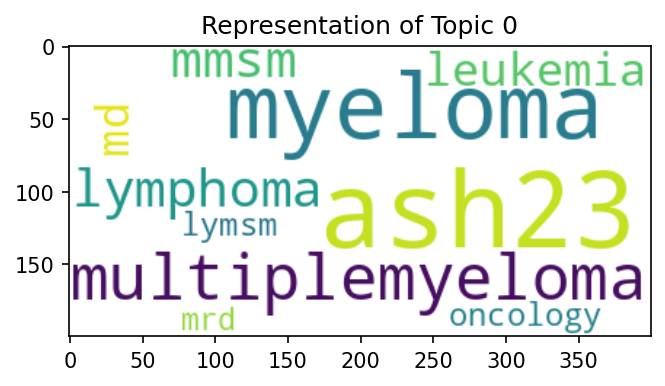

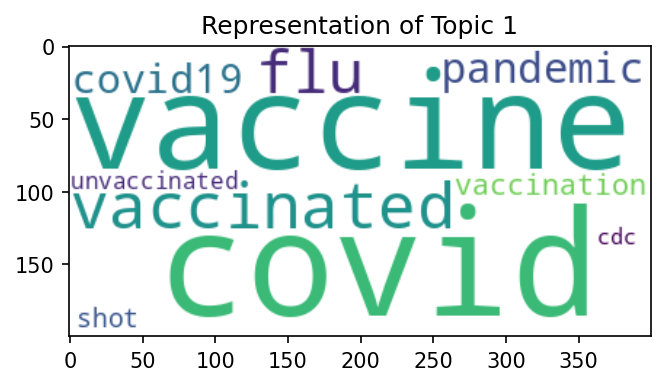

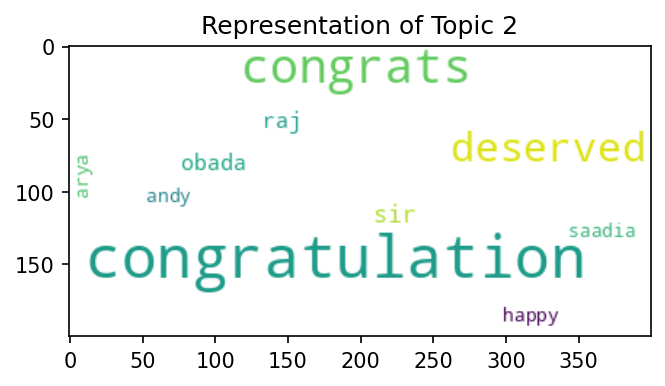

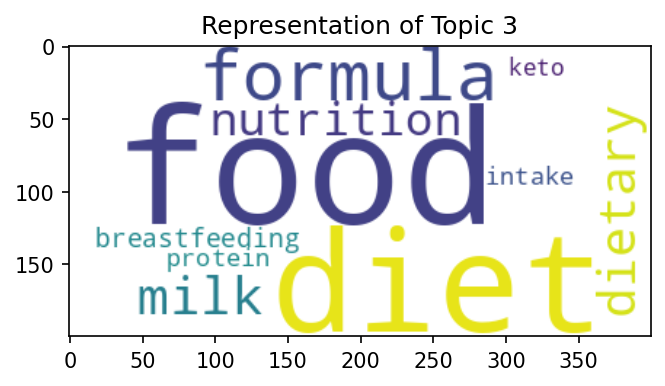

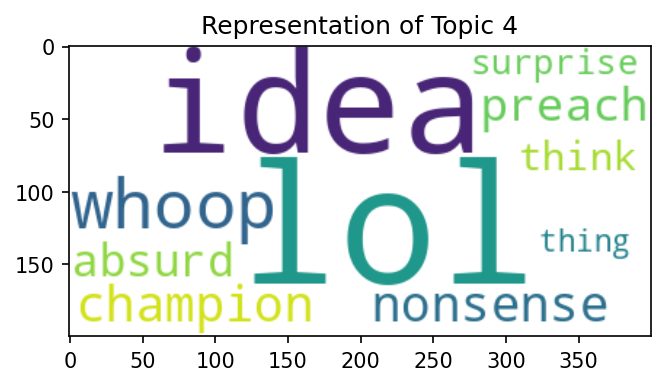

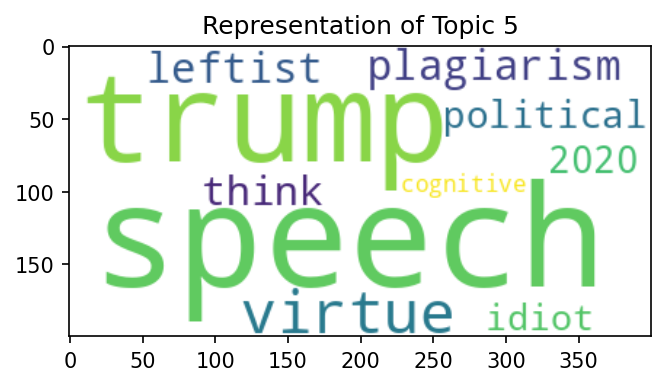

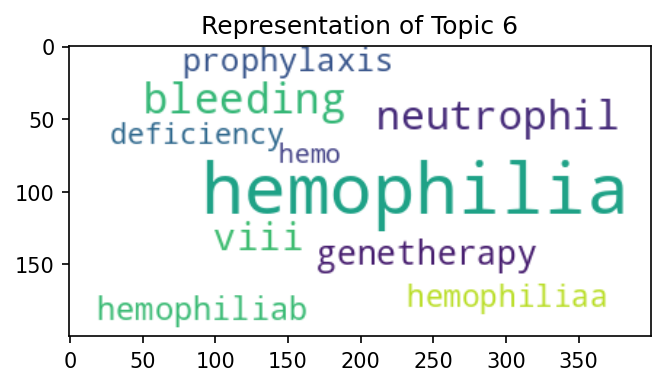

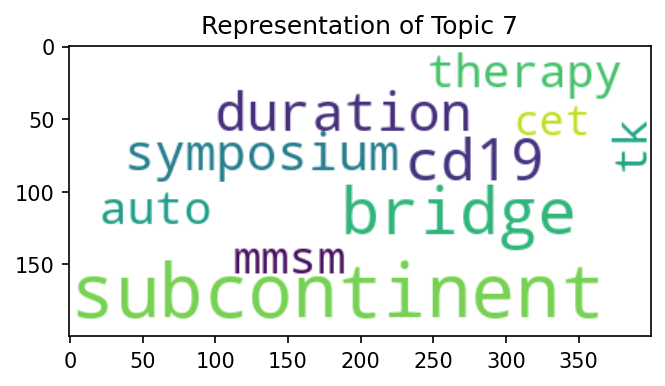

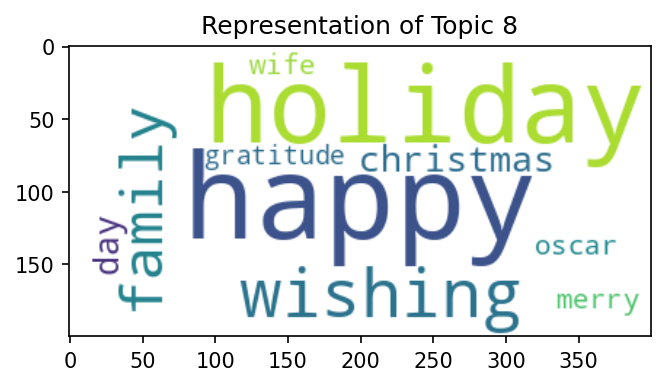

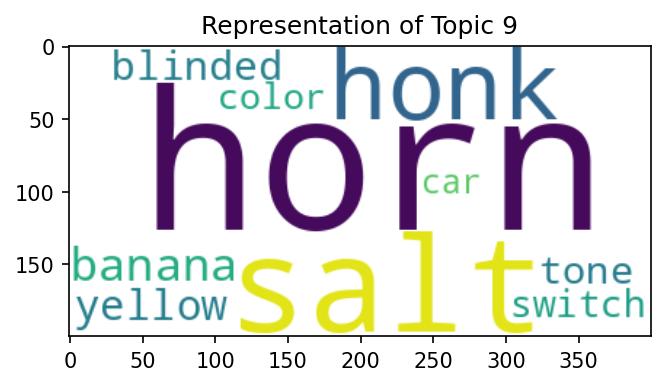

In [61]:
#visualize the top 10 topics
for i in range(0,10):
    create_wordcloud(topic_model, topic=i)

In [62]:
topic_model.visualize_heatmap(top_n_topics=10)

In [63]:
# Extract hierarchical topics and their representations
hierarchical_topics = topic_model.hierarchical_topics(docs)

# Visualize these representations
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 77/77 [00:05<00:00, 15.39it/s]


In [64]:
import pandas as pd
# Assuming 'created_at' is in string format, convert it to datetime
data_tweet['created_at'] = pd.to_datetime(data_tweet['created_at'], errors = 'coerce')

In [65]:
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44184 entries, 0 to 44183
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   author_id       44184 non-null  int64         
 1   tweet_id        44184 non-null  int64         
 2   text            44184 non-null  object        
 3   clean_text      44184 non-null  object        
 4   created_at      44184 non-null  datetime64[ns]
 5   date            44184 non-null  object        
 6   time            44184 non-null  object        
 7   day_of_week     44184 non-null  object        
 8   new_lemma_text  44184 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 3.0+ MB


In [68]:
import pandas as pd
# Assuming 'created_at' is in string format, convert it to datetime
data_tweet1['created_at'] = pd.to_datetime(data_tweet1['created_at'], errors = 'coerce')

# Create a new column for the date, time, and day
data_tweet1['date'] = data_tweet1['created_at'].dt.date
data_tweet1['time'] = data_tweet1['created_at'].dt.time
data_tweet1['day_of_week'] = data_tweet1['created_at'].dt.day_name()
# Display the updated DataFrame
data_tweet1

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week,new_lemma_text
0,1505548981467758594,1732424215666770309,@JuliusEffing @goddeketal @VPrasadMDMPH The pr...,problem ’ listen apparently completely void em...,2023-12-06 15:38:14+00:00,2023-12-06,15:38:14,Wednesday,problem ’ listen apparently completely void em...
1,2330640865,1732417301599949272,@JAMouabbi @MDAndersonNews @LobularBCA @OncoAl...,thank highlighting trial targeting her2 mutati...,2023-12-06 15:10:46+00:00,2023-12-06,15:10:46,Wednesday,thank highlighting trial targeting her2 mutati...
2,75550503,1732417280271884435,@RahulBanerjeeMD Tandem 2024 ??,tandem 2024 ? ?,2023-12-06 15:10:41+00:00,2023-12-06,15:10:41,Wednesday,tandem 2024 ? ?
3,4352131223,1732416645015261509,@DanielFrigo @SmiragliaLab @MDAndersonNews @CR...,big congrats !,2023-12-06 15:08:09+00:00,2023-12-06,15:08:09,Wednesday,big congrats !
7,1247994699425726467,1732412426744983783,@may_daher @lab_rezvani @MDAndersonNews @ASH_h...,amazing personified .,2023-12-06 14:51:23+00:00,2023-12-06,14:51:23,Wednesday,amazing personified .
...,...,...,...,...,...,...,...,...,...
44175,499573700,1767168904038891720,Recognize the signs of Multiple Myeloma – from...,recognize signs multiple myeloma – bone pain a...,2024-03-11 12:41:13+00:00,2024-03-11,12:41:13,Monday,recognize sign multiple myeloma – bone pain ab...
44176,1354682124,1767164808254644341,How much do you know about #MultipleMyeloma? T...,"much know multiplemyeloma ? month , take time ...",2024-03-11 12:24:57+00:00,2024-03-11,12:24:57,Monday,"much know multiplemyeloma ? month , take time ..."
44177,22195223,1767143432563085587,Linne-Mclaren provides her insights into the p...,linne-mclaren provides insights proactive meas...,2024-03-11 11:00:00+00:00,2024-03-11,11:00:00,Monday,linne-mclaren provides insight proactive measu...
44179,1037692894197542917,1767128835177259159,"❓ Did you know, there are 3 main types of #Blo...","know , 3 main types bloodcancer ? leukaemia , ...",2024-03-11 10:02:00+00:00,2024-03-11,10:02:00,Monday,"know , 3 main type bloodcancer ? leukaemia , l..."


In [70]:
timestamp=data_tweet1.created_at.tolist()

In [71]:
topics_over_time = topic_model.topics_over_time(tweet_list, timestamp, nr_bins=20)
topics_over_time

20it [00:31,  1.56s/it]


,Topic,Words,Frequency,Timestamp
0,-1,"ash23, myeloma, time, meeting, mmsm",1079,2023-12-03 10:42:21.732999936+00:00
1,0,"ash23, hematology, lymsm, lymphoma, myeloma",892,2023-12-03 10:42:21.732999936+00:00
2,1,"covid, vaccine, covid19, record, hrsa",51,2023-12-03 10:42:21.732999936+00:00
3,2,"congratulation, congrats, mostafa, bhausaheb, ...",86,2023-12-03 10:42:21.732999936+00:00
4,3,"diet, nutrient, dairy, eat, vegan",8,2023-12-03 10:42:21.732999936+00:00
...,...,...,...,...
960,59,"vocal, join, west, club, whitelist",2,2024-03-07 06:18:29.649999872+00:00
961,65,"claudine, kulldorff, iliad, depicted, stenogra...",1,2024-03-07 06:18:29.649999872+00:00
962,69,"slope, speed, bunny, trail, rise",2,2024-03-07 06:18:29.649999872+00:00
963,71,"undocumented, migrant, mandated, deported, uae",1,2024-03-07 06:18:29.649999872+00:00


In [72]:
topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>',height = 450, width = 850)

In [73]:

topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [74]:
#topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>', normalize_frequency= True,height = 450, width = 850)